<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Automobile - Predict "Price"</font></h1>
<h2 align="center"><font size="5">Deadline: 2022-05-14 23:59:59 (Saturday)</font></h2>
<h3 align="center"><font size="5">Total marks: 6.0</font></h3>

### Your information:
- Fullname: Dương Hoàng Tiến
- Date of birth: 19/02/2001
- Place of birth: Long An
- Email: htduong25@gmail.com
- Mobile phone: 0839343574

In this notebook, we practice all the knowledge and skills that we have learned in this course (LDS5: Data pre-processing and Analysis)

We apply the **Linear Regression Algorithm** to predict: **"price of car"** by accuracy evaluation methods.

Please read [Automobile information](https://archive.ics.uci.edu/ml/datasets/Automobile) carefully before you do this project!

Dataset: imports_85.csv

#### Attribute Information:
Attribute: Attribute Range
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. **price: continuous from 5118 to 45400.**

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [430]:
df = pd.read_csv('imports_85.csv', header=None)

In [431]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [432]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [433]:
columns_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration",
                "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base",
                "length", "width", "height", "curb-weight", "engine-type",
                "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
                "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
df.columns = columns_names

In [434]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [435]:
df.shape

(205, 26)

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [437]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [438]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [439]:
# tìm null trong tập dữ liệu
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [440]:
for m in columns_names:
    print(m,df[m].unique()[:10])
# kiểm tra lại tên cột

symboling [ 3  1  2  0 -1 -2]
normalized-losses ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148']
make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz']
fuel-type ['gas' 'diesel']
aspiration ['std' 'turbo']
num-of-doors ['two' 'four' '?']
body-style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels ['rwd' 'fwd' '4wd']
engine-location ['front' 'rear']
wheel-base [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4]
length [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197. ]
width [64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9]
height [48.8 52.4 54.3 53.1 55.7 55.9 52.  53.7 56.3 53.2]
curb-weight [2548 2823 2337 2824 2507 2844 2954 3086 3053 2395]
engine-type ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
num-of-cylinders ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
engine-size [130 152 109 136 131 108 164 209  61  90]
fuel-system ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi

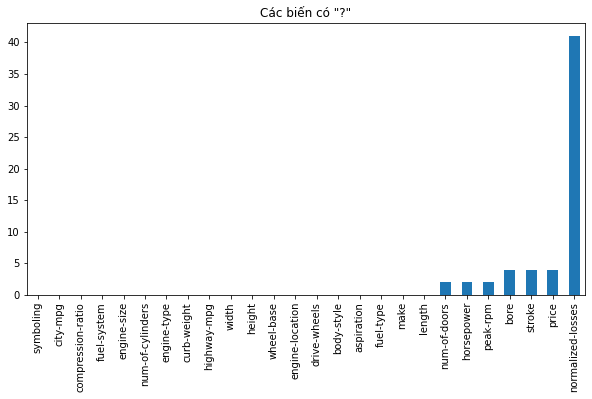

In [441]:
# Tìm các "?"
plt.figure(figsize=(10,5))
(df == '?').sum().sort_values().plot.bar()
plt.title('Các biến có "?"')
plt.show()

- Một số cột có chứa "?".
- Trong đó cột normalized-losses có nhiều nhất <br>
Tiến hành thay "?" bằng NaN

In [442]:
for m in columns_names:
    if '?' in df[m].unique():
        print(m,df[m].dtype)
        df[m]=df[m].replace({'?':np.nan})

normalized-losses object
num-of-doors object
bore object
stroke object
horsepower object
peak-rpm object
price object


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#### Kiểm tra các cột có null

In [444]:
# kiểm cột num-of-doors
print(df['num-of-doors'].mode())
df['num-of-doors'].unique()

0    four
dtype: object


array(['two', 'four', nan], dtype=object)

In [445]:
# Thay các giá trị NaN của num-of-doors bằng Mode của num-of-doors
df['num-of-doors']= df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])

In [446]:
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [447]:
df['normalized-losses'].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [448]:
df['normalized-losses']= df['normalized-losses'].fillna(df['normalized-losses'].mode()[0])

In [449]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [450]:
df['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.50', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.60', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', nan, '3.39', '3.76', '3.58', '3.46', '3.80',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.70', '3.61',
       '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [451]:
df['bore'].mode()
df['bore']= df['bore'].fillna(df['bore'].mode()[0])

In [452]:
df['stroke']= df['stroke'].fillna(df['stroke'].mode()[0])

In [453]:
df['horsepower'].mode()

0    68
dtype: object

In [454]:
df['horsepower']= df['horsepower'].fillna(df['horsepower'].mode()[0])
df['peak-rpm']= df['peak-rpm'].fillna(df['peak-rpm'].mode()[0])
df['price']= df['price'].fillna(df['price'].mode()[0])

In [455]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [457]:
df['horsepower'] = df['horsepower'].astype('int32')
df['horsepower'].dtype

dtype('int32')

In [458]:
df['price'] = df['price'].astype('int32')
df['price'].dtype

dtype('int32')

#### Phân tích các biến

##### Biến liên tục

In [459]:
def Continuous(df, name):
    plt.figure(figsize=(16,5))
    plt.subplot(1,3,1)
    plt.hist(df[name])
    plt.subplot(1,3,2)
    sns.distplot(df[name])
    plt.subplot(1,3,3)
    plt.boxplot(df[name])
    plt.show()
    return df[name].agg(['var','skew','kurtosis']), df[name].quantile([0.25, 0.5, 0.75, 0.95])

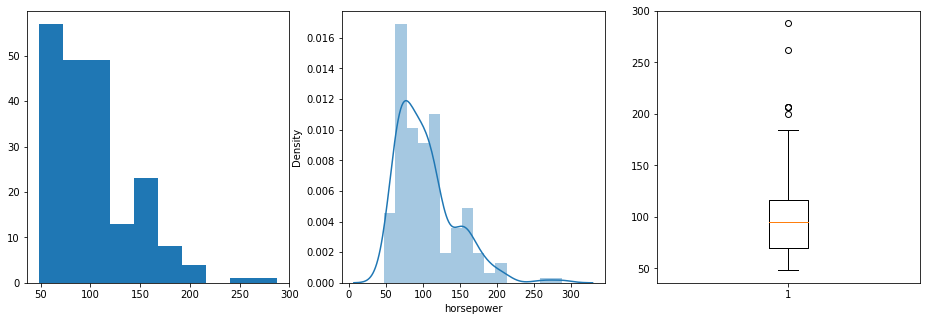

(var         1574.529651
 skew           1.400259
 kurtosis       2.643255
 Name: horsepower, dtype: float64,
 0.25     70.0
 0.50     95.0
 0.75    116.0
 0.95    180.8
 Name: horsepower, dtype: float64)

In [460]:
# phân tích biến horsepower
Continuous(df, 'horsepower')

In [461]:
# Phân phối lệch phải
# Phân phối nhọn hơn phân phối chuẩn

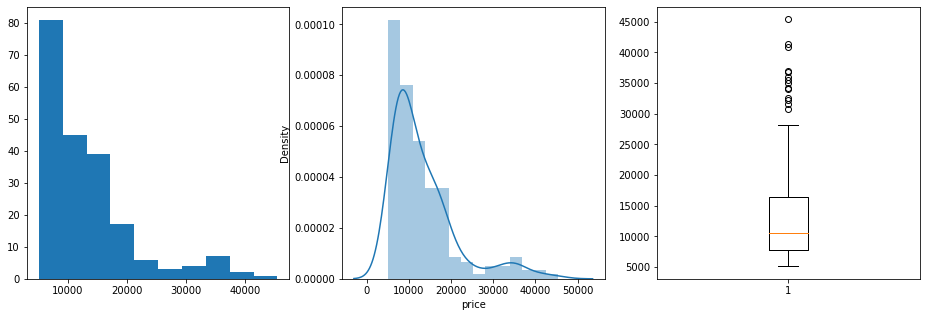

(var         6.191915e+07
 skew        1.825060e+00
 kurtosis    3.348486e+00
 Name: price, dtype: float64,
 0.25     7788.0
 0.50    10595.0
 0.75    16500.0
 0.95    32472.4
 Name: price, dtype: float64)

In [462]:
# phân tích biến price
Continuous(df, 'price')

In [463]:
# Phân phối lệch phải
# Phân phối nhọn hơn phân phối chuẩn

##### Biến phân loại

In [464]:
def Category(df, name, cont):
    count = df[name].value_counts()
    if cont:
        plt.figure(figsize=(10,8))
    count.sort_values().plot.bar()
    plt.show()
    return count

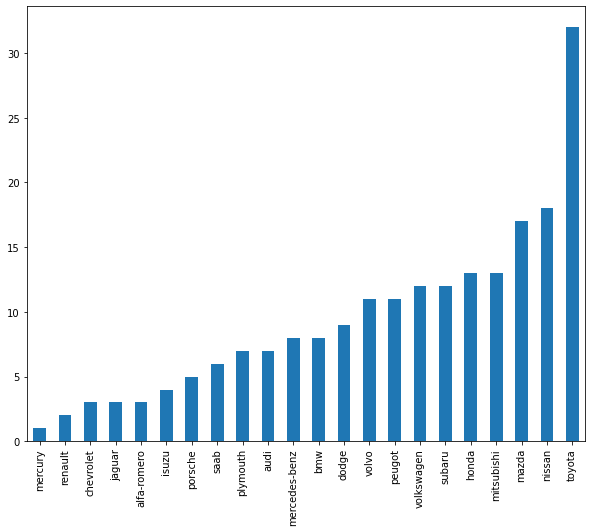

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
jaguar            3
chevrolet         3
renault           2
mercury           1
Name: make, dtype: int64

In [465]:
# Phân tích biến make
Category(df, 'make', True)

In [466]:
# make đại diện cho cái hãng xe.
# Có tất cả 22 hãng trong đó các hãng xe đến từ nhật bản toyota, nissanm mazda chiếm tỉ trọng cao.

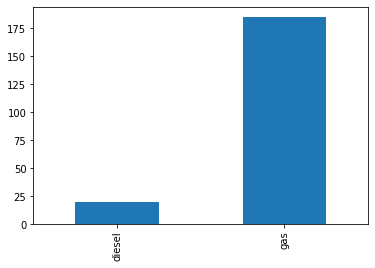

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [467]:
# Phân tích biến fuel-type
Category(df,'fuel-type', False)

In [468]:
# có hai dòng nhiên liệu: diesel và gas.
# Gas là loại nhiên liệu được các hãng xe ưu thích.

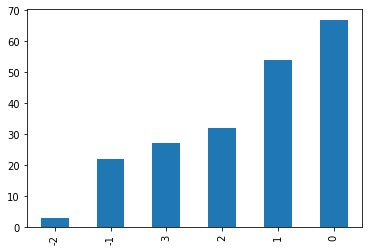

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [469]:
# Phân tích biến symboling
Category(df,'symboling', False)

In [470]:
# symboling thể hiện độ an toàn.#
# Đa số các xe điều có độ an toàn ở mức trung bình.

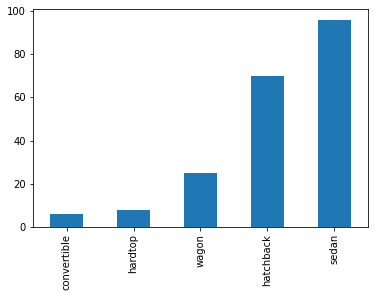

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [471]:
# Phân tích biến body-style
Category(df,'body-style',False)

In [472]:
# hai dòng xe được ưu chuộng nhất là sedan và hatchback.

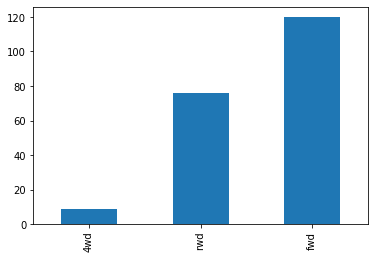

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [473]:
# Phân tích biến drive-wheels
Category(df, 'drive-wheels',False)

In [474]:
# Trong drive-wheels có hai loại phổ biến là rwd và fwd

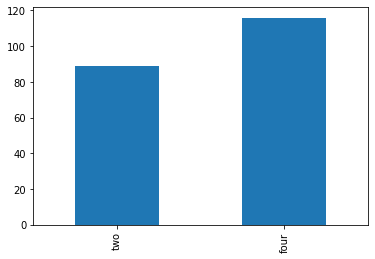

four    116
two      89
Name: num-of-doors, dtype: int64

In [475]:
# Phân tích biến num-of-doors
Category(df,'num-of-doors',False)

In [476]:
# xe bốn cửa được yêu thích hơn xe hai của 

#### Phân tích hai biến

##### Hai biến liên tục

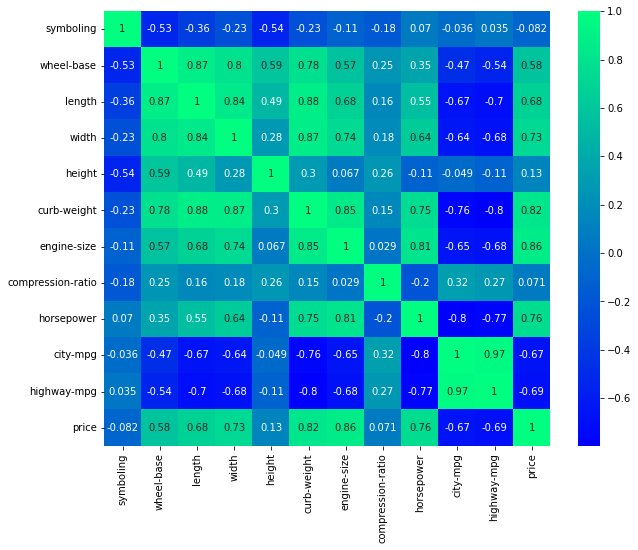

In [477]:
plt.figure(figsize=(10,8), )
sns.heatmap(df.corr(), annot=True, cmap='winter')
plt.show()

In [478]:
corr = df.corr()

In [479]:
# Danh sách các biến liên tục có tương qua với price
lst_con = corr.price.sort_values(ascending=False)[1:]
lst_con = lst_con[(lst_con>0.5)|(lst_con<-0.5)]
lst_con

engine-size    0.861769
curb-weight    0.820807
horsepower     0.759731
width          0.729009
length         0.682528
wheel-base     0.582915
city-mpg      -0.667215
highway-mpg   -0.690173
Name: price, dtype: float64

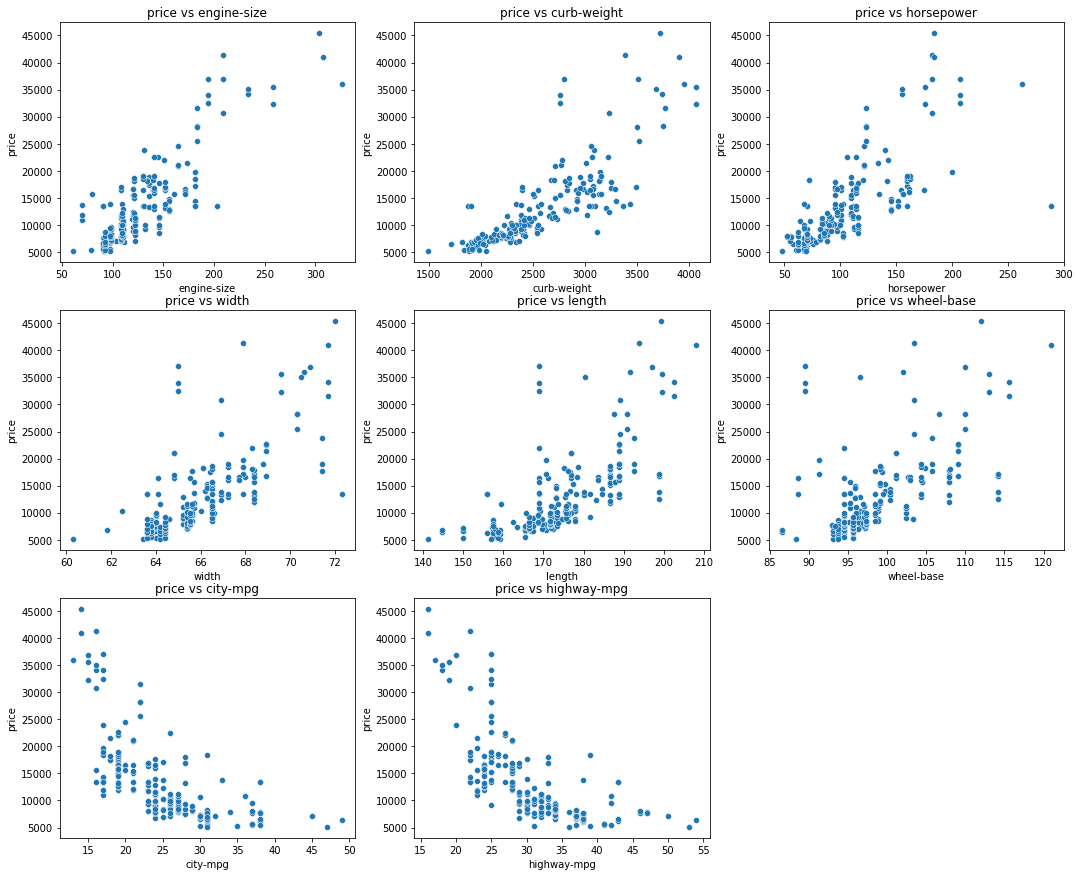

In [480]:
i = 0;
plt.figure(figsize=(18,15))
for col in lst_con.index:
    i = i + 1;
    plt.subplot(3,3,i)
    sns.scatterplot(data=df, x=col, y='price')
    plt.title('price vs '+col)
plt.show()

##### Biến phân loại và biến liên tục

In [481]:
from sklearn import preprocessing

In [482]:
label_encoder = preprocessing.LabelEncoder()

In [483]:
# ANOVA: body-style, drive-wheels có ảnh hưởng đến price
d_melt = df[['body-style','drive-wheels','price']]
d_melt.columns = ['body_style', 'drive_wheels','price']
d_melt.head()

,body_style,drive_wheels,price
0,convertible,rwd,13495
1,convertible,rwd,16500
2,hatchback,rwd,16500
3,sedan,fwd,13950
4,sedan,4wd,17450


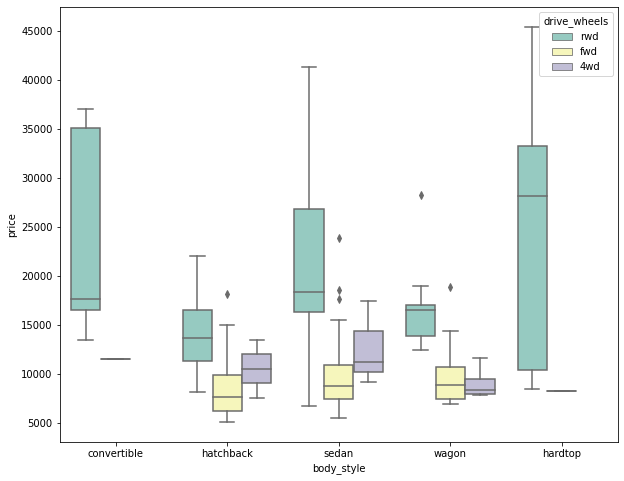

In [484]:
plt.figure(figsize=(10,8))
sns.boxplot(x='body_style', y='price', hue='drive_wheels', data=d_melt, palette='Set3')
plt.show()

In [485]:
d_melt['body_style'] = label_encoder.fit_transform(d_melt['body_style'])
d_melt['drive_wheels'] = label_encoder.fit_transform(d_melt['drive_wheels'])
d_melt.head()

,body_style,drive_wheels,price
0,0,2,13495
1,0,2,16500
2,2,2,16500
3,3,1,13950
4,3,0,17450


In [486]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price ~ C(body_style) + C(drive_wheels) + C(body_style):C(drive_wheels)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(body_style),5.067119e+08,4.0,3.754976,5.766948e-03
C(drive_wheels),5.788561e+09,2.0,85.791984,2.392569e-27
C(body_style):C(drive_wheels),5.976013e+08,8.0,2.214255,2.803820e-02
Residual,6.477316e+09,192.0,NaN,NaN


In [487]:
# body-style, drive_wheels điều có ảnh hưởng đến price.
# khi kết hợp hai biến này lại cũng có ảnh hưởng đến price

In [488]:
# ANOVA: fuel-type, fuel-system có ảnh hưởng đến price
d_melt = df[['fuel-type','fuel-system','price']]
d_melt.columns = ['fuel_type','fuel_system','price']
d_melt.head()

,fuel_type,fuel_system,price
0,gas,mpfi,13495
1,gas,mpfi,16500
2,gas,mpfi,16500
3,gas,mpfi,13950
4,gas,mpfi,17450


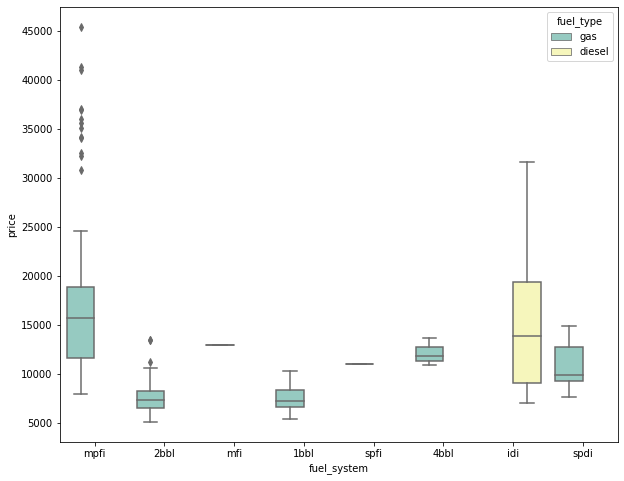

In [489]:
plt.figure(figsize=(10,8))
sns.boxplot(x='fuel_system', y='price', hue='fuel_type', data=d_melt, palette='Set3')
plt.show()

In [490]:
d_melt['fuel_type'] = label_encoder.fit_transform(d_melt['fuel_type'])
d_melt['fuel_system'] = label_encoder.fit_transform(d_melt['fuel_system'])
d_melt.head()

,fuel_type,fuel_system,price
0,1,5,13495
1,1,5,16500
2,1,5,16500
3,1,5,13950
4,1,5,17450


In [491]:
model = ols('price ~ C(fuel_type) + C(fuel_system) + C(fuel_type):C(fuel_system)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(fuel_type),1.516466e+06,1.0,0.036079,8.495479e-01
C(fuel_system),1.996138e+09,7.0,6.784452,1.490100e-06
C(fuel_type):C(fuel_system),4.898249e+09,7.0,16.648119,1.676710e-15
Residual,8.280258e+09,197.0,NaN,NaN


In [492]:
# fuel_system ảnh hưởng đến price còn fuel_type thì không
# Sự phối hợp của fuel_system và fuel_type có ảnh hưởng đáng kể đến price

In [493]:
# ANOVA: engine-type, num-of-cylinders có ảnh hưởng đến price
d_melt = df[['engine-type','num-of-cylinders','price']]
d_melt.columns = ['engine_type','num_of_cylinders','price']
d_melt.head()

,engine_type,num_of_cylinders,price
0,dohc,four,13495
1,dohc,four,16500
2,ohcv,six,16500
3,ohc,four,13950
4,ohc,five,17450


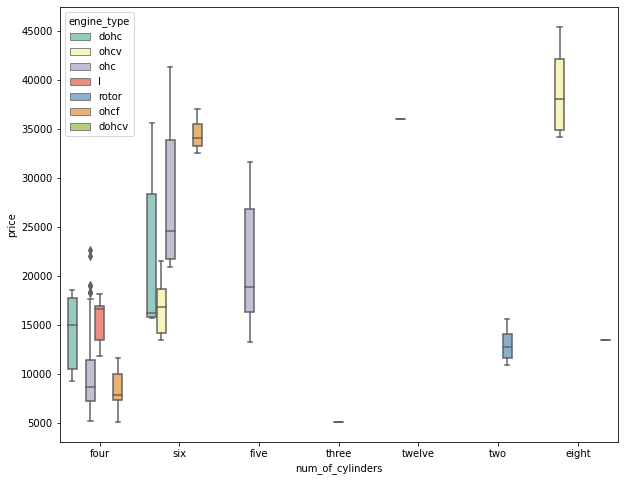

In [494]:
plt.figure(figsize=(10,8))
sns.boxplot(x='num_of_cylinders', y='price', hue='engine_type', data=d_melt, palette='Set3')
plt.show()

In [495]:
d_melt['engine_type'] = label_encoder.fit_transform(d_melt['engine_type'])
d_melt['num_of_cylinders'] = label_encoder.fit_transform(d_melt['num_of_cylinders'])
d_melt.head()

,engine_type,num_of_cylinders,price
0,0,2,13495
1,0,2,16500
2,5,3,16500
3,3,2,13950
4,3,1,17450


In [496]:
model = ols('price ~ C(engine_type) + C(num_of_cylinders) + C(engine_type):C(num_of_cylinders)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(engine_type),3.251126e+08,6.0,3.024465,8.362850e-02
C(num_of_cylinders),3.708678e+08,6.0,3.450118,6.478668e-02
C(engine_type):C(num_of_cylinders),1.441090e+10,36.0,22.343672,2.502134e-27
Residual,3.421900e+09,191.0,NaN,NaN


In [497]:
# engine-style và num_of_cylinders điều không ảnh hửng đến price
# Nhưng khi kết hợp lại thì hai biến này có ảnh hương đến price

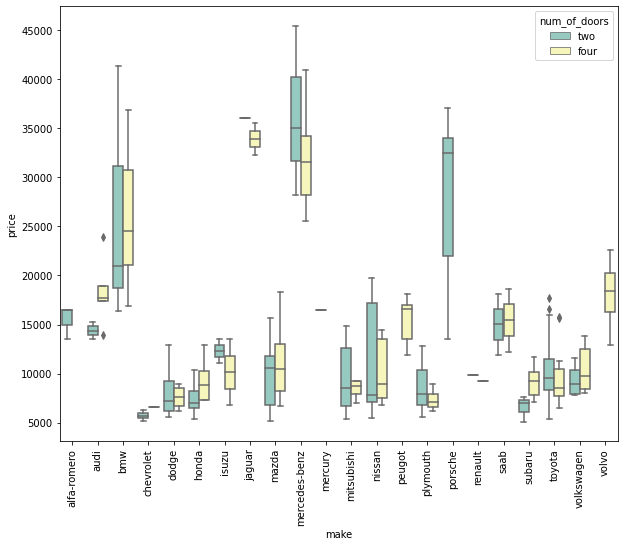

,sum_sq,df,F,PR(>F)
C(make),1.530508e+10,21.0,44.035354,1.172561e-53
C(num_of_doors),NaN,1.0,NaN,NaN
C(make):C(num_of_doors),1.171071e+09,21.0,3.369374,1.221290e-05
Residual,2.747406e+09,166.0,NaN,NaN


In [498]:
# ANOVA: engine-type, num-of-cylinders có ảnh hưởng đến price
d_melt = df[['make','num-of-doors','price']]
d_melt.columns = ['make','num_of_doors','price']
plt.figure(figsize=(10,8))
sns.boxplot(x='make', y='price', hue='num_of_doors', data=d_melt, palette='Set3')
plt.xticks(rotation=90)
plt.show()
d_melt['make'] = label_encoder.fit_transform(d_melt['make'])
d_melt['num_of_doors'] = label_encoder.fit_transform(d_melt['num_of_doors'])
model = ols('price ~ C(make) + C(num_of_doors) + C(make):C(num_of_doors)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

In [499]:
# make có ảnh hưởng lớn đến price

## Linear Regression

In [500]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import statsmodels.api as sm

In [501]:
col = ['make', 'fuel-type',
       'num-of-doors', 'body-style', 'drive-wheels',
       'engine-type',
       'num-of-cylinders','fuel-system']

In [502]:
df_lin = df.copy()

In [503]:
for i in col:
    df_lin[i] = label_encoder.fit_transform(df_lin[i])
df_lin.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,161,0,1,std,1,0,2,front,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,161,0,1,std,1,0,2,front,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,161,0,1,std,1,2,2,front,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,1,std,0,3,1,front,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,1,1,std,0,3,0,front,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450


In [504]:
for i in lst_con.index:
    col.append(i)

In [505]:
df_LR = df_lin[col]
df_LR.head()

,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-type,num-of-cylinders,fuel-system,engine-size,curb-weight,horsepower,width,length,wheel-base,city-mpg,highway-mpg
0,0,1,1,0,2,0,2,5,130,2548,111,64.1,168.8,88.6,21,27
1,0,1,1,0,2,0,2,5,130,2548,111,64.1,168.8,88.6,21,27
2,0,1,1,2,2,5,3,5,152,2823,154,65.5,171.2,94.5,19,26
3,1,1,0,3,1,3,2,5,109,2337,102,66.2,176.6,99.8,24,30
4,1,1,0,3,0,3,1,5,136,2824,115,66.4,176.6,99.4,18,22


In [506]:
X = df_LR; y = df_lin.price

In [507]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [508]:
LR = LinearRegression()

In [509]:
LR.fit(X_train.values,y_train)

LinearRegression()

In [510]:
y_pred = LR.predict(X_test)

In [511]:
a = LR.intercept_
b = LR.coef_
a, b

(-30943.040238590725,
 array([-1.38063848e+02, -8.03090766e+02, -1.45968496e+03, -1.57408601e+03,
         8.94553507e+02,  6.11564270e+02,  2.54332353e+02,  1.47632129e+02,
         7.82841653e+01,  3.52437060e-01,  2.78289951e+01,  2.14884359e+02,
         8.37323569e+01,  8.55187722e+01,  2.14042996e+02, -2.95011569e+02]))

In [512]:
r2_score(y_pred,y_test)

0.7070452937298618

In [513]:
print('The full R-square is:', LR.score(X,y))
print('The train R-square is:', LR.score(X_train,y_train))
print('The test R-square is:', LR.score(X_test,y_test))

The full R-square is: 0.8111503042595498
The train R-square is: 0.8307788633915436
The test R-square is: 0.7723230224597082


In [514]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('The MSE of price and predicted value is: ', mse)
print('The MAE of price and predicted value is: ', mae)

The MSE of price and predicted value is:  15628387.898268288
The MAE of price and predicted value is:  2708.442539362236


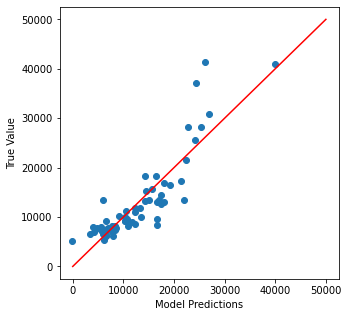

In [515]:
plt.figure(figsize=(5,5))
plt.scatter(y_pred, y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 50000], [0, 50000], '-', color = 'r')
plt.show()

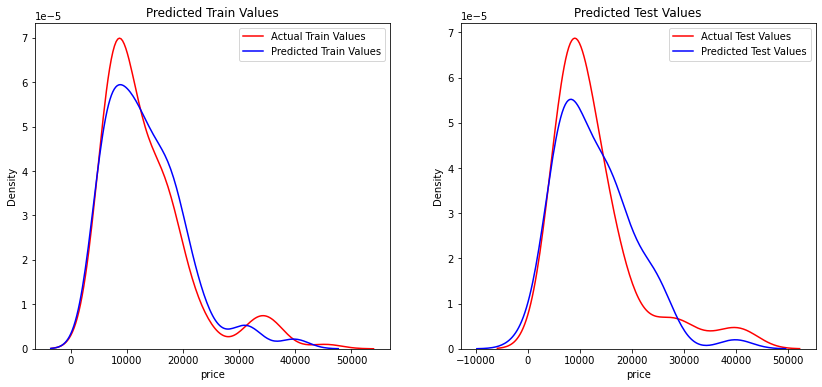

In [516]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns. distplot(y_train, hist=False, color="r", label="Actual Train Values")
sns.distplot(LR.predict(X_train), hist=False, color="b", 
             label="Predicted Train Values", ax=ax1)
plt.legend()
plt.title("Predicted Train Values")
plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r",label="Actual Test Values")
sns.distplot(LR.predict (X_test), hist=False, color="b",label="Predicted Test Values", ax=ax2)
plt.legend()
plt.title("Predicted Test Values")
plt.show()

- Hình 1 ta thấy sự phân phối dữ liệu ở trong hình 1 là khá tốt trong việc fit dữ liệu.
- Hình 2 có sự khác biệt rõ nhất trong phạm vi price > 10000. <br>
Kết luận: với các mẫu oto có giá cao, ngoài các thuộc tính trong tập dữ liệu còn các yếu tố khác quyết định giá của của oto nên việc dự đoán các xe có giá cao sẽ gặp nhiều khó khăn hơn.